In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

In [2]:
# https://www.kaggle.com/tunguz/deep-solar-dataset
df = pd.read_csv('deepsolar_tract.csv', encoding='latin-1')

In [58]:
for col in df.columns:
    print(col)

Unnamed: 0
tile_count
solar_system_count
total_panel_area
fips
average_household_income
county
education_bachelor
education_college
education_doctoral
education_high_school_graduate
education_less_than_high_school
education_master
education_population
education_professional_school
employed
gini_index
heating_fuel_coal_coke
heating_fuel_electricity
heating_fuel_fuel_oil_kerosene
heating_fuel_gas
heating_fuel_housing_unit_count
heating_fuel_none
heating_fuel_other
heating_fuel_solar
land_area
per_capita_income
population
population_density
poverty_family_below_poverty_level
poverty_family_count
race_asian
race_black_africa
race_indian_alaska
race_islander
race_other
race_two_more
race_white
state
total_area
unemployed
water_area
education_less_than_high_school_rate
education_high_school_graduate_rate
education_college_rate
education_bachelor_rate
education_master_rate
education_professional_school_rate
education_doctoral_rate
race_white_rate
race_black_africa_rate
race_indian_alaska_rate

In [3]:
for col in df.columns:
    try:
        pd.to_numeric(df[col])
    except:
        print(col)

county
state
electricity_price_transportation


In [4]:
df = df.dropna()

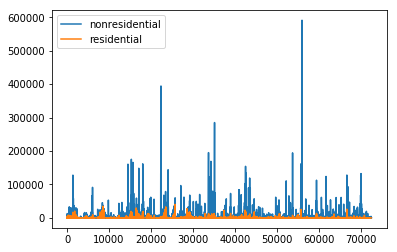

In [32]:
# df['total_panel_area_nonresidential'].plot()
# df['total_panel_area_residential'].plot()

plt.plot(df.index, df['total_panel_area_nonresidential'], label= 'nonresidential')
plt.plot(df.index, df['total_panel_area_residential'], label= 'residential')

plt.legend()

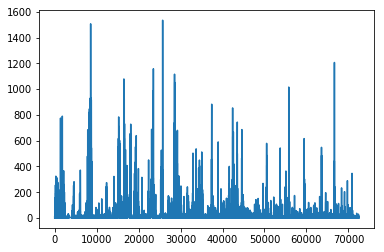

In [33]:
plt.plot(df.index, df['solar_system_count'])

In [5]:
target = 'total_panel_area'
omit = ['Unnamed: 0', 'fips', 'county', 'state', 'electricity_price_transportation', 'total_panel_area_residential',
'total_panel_area_nonresidential']

X = df.loc[:, ~(df.columns).isin([target]+ omit)]
Y = df[target]

In [25]:
df['county'][df[target].argmax()], df['state'][df[target].argmax()]

c:\users\jordan landers\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


('Cumberland County', 'nc')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y)

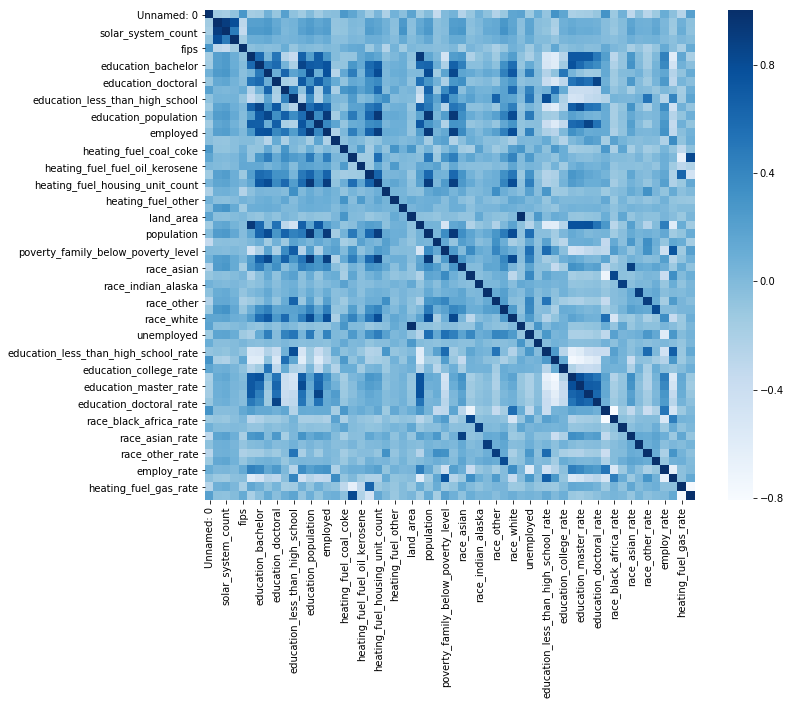

In [14]:
corrmat = df[df.columns[0:60]].corr()#alt_X_df.corr()

fig, ax = plt.subplots(1,1, figsize = (12,9))
sns.heatmap(corrmat, vmax = 1, square = True, annot=False,cmap='Blues')

## Linear Regression

In [7]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
pred = lin_reg.predict(X_test)

In [9]:
lin_reg.score(X_test, y_test)

0.84540096714124469

In [81]:
X.columns[lin_reg.coef_.argsort()]

Index(['electricity_consume_total', 'education_professional_school',
       'education_college', 'education_less_than_high_school',
       'education_bachelor', 'education_doctoral', 'education_master',
       'education_high_school_graduate', 'race_islander', 'race_two_more',
       ...
       'heating_fuel_coal_coke', 'heating_fuel_gas',
       'heating_fuel_electricity', 'heating_fuel_none', 'heating_fuel_other',
       'population', 'education_population', 'electricity_consume_residential',
       'electricity_consume_industrial', 'electricity_consume_commercial'],
      dtype='object', length=160)

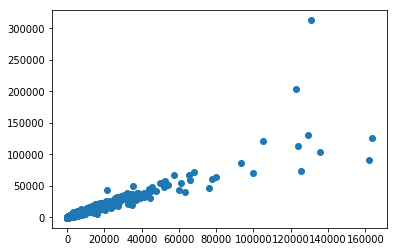

In [10]:
plt.scatter(y_test,pred)

In [11]:
lasso = linear_model.Lasso()
lasso.fit(X_train, y_train)
lasso.score(X_test, y_test)

c:\users\jordan landers\appdata\local\programs\python\python36-32\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.84682959668865887

In [17]:
ridge = linear_model.Ridge()
ridge.fit(X_train, y_train)
ridge.score(X_test, y_test)

0.84623310790834372

## Support Vector Machines (Regression)

In [40]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [41]:
from sklearn.svm import SVR
params = {'kernel' :'linear'}
svr = SVR(**params)
svr.fit(scaler.transform(X_train), y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [42]:
preds = svr.predict(scaler.transform(X_test))
svr.score(scaler.transform(X_test), y_test)

0.79519612203969858

## Ensemble Methods

In [36]:
from sklearn import ensemble

params = {'n_estimators': 500,
          'max_depth': 2,
          }

bg_reg = ensemble.GradientBoostingRegressor(**params)
bg_reg.fit(X_train, y_train)
bg_reg.score(X_test, y_test)

0.92851024413168537

In [43]:
from sklearn import ensemble

# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(X_train, y_train)


NameError: name 'mean_squared_error' is not defined

MSE: 5718081.8902


Text(0.5,1,'Variable Importance')

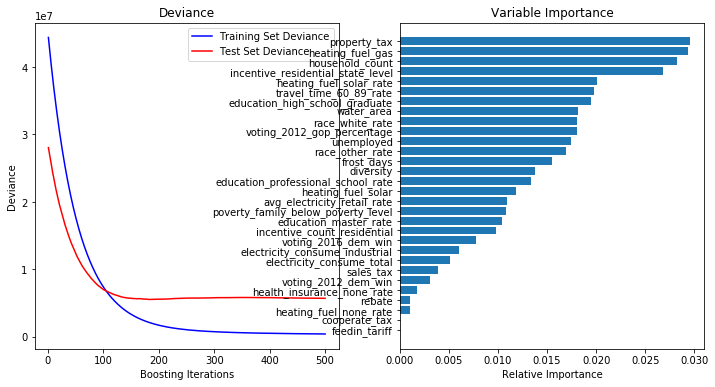

In [49]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, clf.predict(X_test))
print("MSE: %.4f" % mse)

# #############################################################################
# Plot training deviance

# compute test set deviance
test_score = np.zeros((params['n_estimators'],), dtype=np.float64)

for i, y_pred in enumerate(clf.staged_predict(X_test)):
    test_score[i] = clf.loss_(y_test, y_pred)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, clf.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

# #############################################################################
# Plot feature importance
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos[:30], feature_importance[sorted_idx][:30], align='center')
plt.yticks(pos[:30], X_test.columns[sorted_idx][:30])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')